# <center>KIỂM ĐỊNH GIẢ THUYẾT (TẬP 2)</center>

# FAQ
1. Dùng H0 với phân phối normal hay student-t?  
n $\geq$ 30 thì dùng normal, không thì dùng t với độ tự do dof=n-1
2. Kiểm định giả thuyết với H0 $\sim$ normal còn gọi là t-test?  
Yes
3. Con số 0.05 là 1 bên hay 2 bên phân phối ( one-tailed or two-tailed )?  
Tuỳ vào research hypothesis mình đặt ra:  
    - H1: x > a => khoảng cut-off 0.05 để từ chối H0 ở bên phải.
    - H1: x < a => khoảng cut-off 0.05 để từ chối H0 ở bên trái.
    - H1: x $\neq$ a => khoảng cut-off 0.05 chia làm 2 bên (0, 0.025) và (0.975, 1)  
Ví dụ: 2-tailed h1 thì kết quả t-test có p-value =0.03,  
 0.025< 0.03 <0.05, vì là 2-tailed nên H0 không bị từ chối.  
 
 <img align="left" src="https://miro.medium.com/max/1126/1*U2gOU1KYrADytx0ej3fVqA.jpeg">

# MỤC LỤC
1. [t-test trung bình 1 sample](#Nh%E1%BA%AFc-l%E1%BA%A1i-t-test-trung-b%C3%ACnh-1-sample)
2. [t-test trung bình 2 mẫu độc lập](#t-test-trung-b%C3%ACnh-2-m%E1%BA%ABu-%C4%91%E1%BB%99c-l%E1%BA%ADp)
3. [t-test trung bình 2 mẫu liên quan](#t-test-trung-b%C3%ACnh-2-m%E1%BA%ABu-li%C3%AAn-quan)
4. [t-test proportion 1 sample](#t-test-proportion-1-sample)
5. [t-test proportion 2 mẫu độc lập](#t-test-proportion-2-m%E1%BA%ABu-%C4%91%E1%BB%99c-l%E1%BA%ADp)
6. [chi-squared-test proportion 2 mẫu liên quan](#chi-squared-test-proportion-2-m%E1%BA%ABu-li%C3%AAn-quan)
7. [chi-squared test cho 1 sample đa nhóm](#N%C3%B3i-v%E1%BB%81-Chi-squared-distribution)
8. [chi-squared test cho nhiều samples đa nhóm](#chi-squared-test-nhi%E1%BB%81u-samples-v%E1%BB%9Bi-bi%E1%BA%BFn-%C4%91a-nh%C3%B3m)
9. [Fisher exact test for 2x2 table với biến nhị phân](#Fisher-exact-test-cho-bi%E1%BA%BFn-nh%E1%BB%8B-ph%C3%A2n-v%E1%BA%A7-2-nh%C3%B3m-(-contigency-2x2-table))

---
## Nhắc lại t-test trung bình 1 sample
- **Null hypothesis**: trung bình của sample = m ( trung bình population)
- Sử dụng hàm [ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp) trong scipy.stats  
Input là (dãy số liệu, trung bình của population)  
Output là (z-statistic, p-value)

---
## t-test trung bình 2 mẫu độc lập
- **Null hypothesis**: trung bình của sample A = trung bình của sample B
- Sample A và sample B không liên quan
- Variance của A và B phải gần bằng nhau ( $0.5 < \frac{\sigma^2_A}{\sigma^2_B} < 2 $)
- [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)

---
## t-test trung bình 2 mẫu liên quan
- Là sample trước và sau can thiệp, hoặc sau 1 khoảng thời gian
- **Null hypothesis**: Trung bình của sự thay đổi =0
- Sample A và B cùng cỡ mẫu
- [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)

---
## t-test proportion 1 sample
- **Null hypothesis**: proportion của sample = p ( proportion của population)
- còn gọi là binom test
- Điều kiện để dùng norm là số lượng nhóm yes >5 và nhóm no >5, không thỏa thì dùng student-t
- [scipy.stats.binom_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html#scipy.stats.binom_test)

---
## t-test proportion 2 mẫu độc lập
- **Null hypothesis**: proportion 2 sample bằng nhau
- [statsmodels.stats.proportion.proportions_ztest](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html)

---
## chi-squared test proportion 2 mẫu liên quan
- Là sample trước và sau can thiệp, hoặc sau 1 khoảng thời gian
- **Null hypothesis**: proportion trước và sau không thay đổi
- Còn gọi là McNemar test
- Sử dụng Chi-squared distribution
- Nếu cỡ mẫu ít quá, thì dùng exact mcnemar với binomial distribution
- [statsmodels.sandbox.stats.runs.mcnemar](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.runs.mcnemar.html#statsmodels.sandbox.stats.runs.mcnemar)

---
# Nói về [Chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution)
# chi-squared test cho 1 sample đa nhóm
$ x = \sum_1^{k+1}\frac{(Observe - Expect)^2}{Expect} \sim \chi^2 (k) \quad \text{ k là độ tự do} $  
Ví dụ: trong biến outcome có 5 nhóm, thì k = 5-1 = 4 độ tự do  
Chi-squared distribution là one-tailed

In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

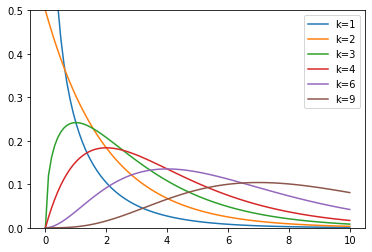

In [2]:
arr = np.linspace(0,10,100)
k = [1,2,3,4,6,9]
for i in k:
    plt.plot(arr, st.chi2(i).pdf(arr), label=f"k={i}")
plt.ylim(0, 0.5)
plt.legend();

Ví dụ:  
Năm đầu tiên, trường đại học thống kê có 60% sinh viên không tập thể dục, 25% tập ít, 15% tập thường xuyên.  
Sau đó, trường ra chương trình khích lệ sinh viên năng tập thể dục hơn.  
Năm 2, trường thống kê lại có 255 không tập thể dục, 125 tập ít, 90 tập thường xuyên.   


| | không tập | tập ít | tập thường xuyên |
|-|-----------|--------|------------------|
|Observe (n=470)| 255| 125  |90  |
|Expect = p% * n | 282| 177.5|70.5|


- **Null hypothesis**: p1_O=p1_E, p2_O=p2_E, p3_O=p3_E
- **Null hypothesis**: tỉ lệ các nhóm bằng với tỉ lệ ($p_1, p_2,...p_{k+1}$)
- [scipy.stats.chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare)
- Đây cũng là chi-squared test
- Dành cho 1 sample với biến đa nhóm

In [3]:
observe = np.array([255, 125, 90])
expect = observe.sum() * np.array([0.6, 0.25, 0.15])
expect

array([282. , 117.5,  70.5])

In [4]:
st.chisquare(observe, expect)

Power_divergenceResult(statistic=8.457446808510639, pvalue=0.014570979931304122)

**p-value <0.05 => sample có tỉ lệ thành phần khác với tỉ lệ (60%, 25%, 15%) có ý nghĩa thống kê**

---
# chi-squared test nhiều samples với biến đa nhóm
- **Null hypothesis**: biến đa nhóm độc lập với loại sample
- Dùng để so sánh tỉ lệ các nhóm giữa các sample có tính chất khác nhau như: nhóm không thuốc, có thuốc, placebo,..
- [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency)

Ví dụ:   

|                 | không tập | tập ít | tập thường xuyên |
|-----------------|-----------|--------|------------------|
|Kí túc xá        |32         |30      |28                |
|Nhà trọ trong KTX|74         |64      |42                |
|Nhà trọ ngoài KTX|110        |25      |15                |
|Ở nhà            |39         |6       |5                 |

**Null hypothesis**: tỉ lệ biến 1:2:3 không phụ thuộc vào (độc lập) loại sample  


In [5]:
data = np.array([[ 32, 30, 28], 
                 [ 74, 64, 42],
                 [110, 25, 15],
                 [ 39,  6,  5]])

# ket qua của chi2_contingency là (chisquare stats, pvalue, degree of freedom, expect value table)
st.chi2_contingency(data)

(60.43944691358026,
 3.6644965577536217e-11,
 6,
 array([[48.82978723, 23.93617021, 17.23404255],
        [97.65957447, 47.87234043, 34.46808511],
        [81.38297872, 39.89361702, 28.72340426],
        [27.12765957, 13.29787234,  9.57446809]]))

**Với pvalue thấp như vậy, thì từ chối H0, tức là tỉ lệ tập thể dục có phụ thuộc vào nơi ở của sinh viên**

---
# Fisher exact test cho biến nhị phân và 2 nhóm ( contingency 2x2 table)
- [scipy.stats.fisher_exact](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html)
- Đối với mẫu quá nhỏ thì pvalue của chisquared không còn chính xác.
- Cho nên với bảng 2x2 thì fisher exact tốt hơn.  
- Sử dụng Hypergeometric distribution.
- **Null hypothesis**: Group độc lập với outcome  

Ví dụ:  

|            |Men|Women|  
|------------|---|-----|  
|Studying    |1  |9    |  
|Not-studying|11 |3    |  
  
   
**Null hypothesis**: Chuyện học hành không liên quan với giới tính. Ta thu thập data như trên

In [19]:
data = np.array([[ 1, 9],
                 [11, 3]])

# output (odd ratio, pvalue)
st.fisher_exact(data)

(0.030303030303030304, 0.0027594561852200745)

Giả sữ chuyện học không liên quan giới tính, Thì xác suất ra data này là 3%. H0 vô hiệu. Vậy học hành có liên quan với giới tính.